### 1. Import Dependencies and Data

In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.0.0
aiohttp                            3.8.1
aiosignal                          1.2.0
alabaster                          0.7.12
altair                             4.2.0
amqp                               5.1.0
anaconda-client                    1.9.0
anaconda-navigator                 2.1.2
anaconda-project                   0.10.1
anyio                              2.2.0
apache-beam                        2.37.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asgiref                            3.5.0
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
asttokens                          2.0.5
astunparse                         1.6.3
async-generator                   

In [3]:
%config Completer.use_jedi = False

In [4]:
# Bringing in tensorflow datasets as fashion mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [6]:
# Use the tensorflow datasets api to bring in the data source
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\USER\tensorflow_datasets\fashion_mnist\3.0.1.incompleteC4V8XC\fashion_mnist-train.tfrecord*…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\USER\tensorflow_datasets\fashion_mnist\3.0.1.incompleteC4V8XC\fashion_mnist-test.tfrecord*.…

Dataset fashion_mnist downloaded and prepared to C:\Users\USER\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [7]:
ds

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [8]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [9]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [10]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [15]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [16]:
ds.as_numpy_iterator().next()['label']

2

### 2. Viz Data and Build Dataset

In [17]:
# Do some data transformation
import numpy as np

In [18]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [19]:
# Getting data out of the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [25]:
dataiterator.next()['image'].shape

(28, 28, 1)

In [28]:
np.squeeze(dataiterator.next()['image'])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          6,   7,  22,  29,  46,  73,  83,  96, 104, 115, 113,  43,  64,
         64,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0, 134,
        183, 176, 217, 225, 227, 217, 207, 201, 205, 193, 178, 214, 168,
         86,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  95,
        176, 168, 175, 154, 151, 157, 159, 159, 163, 160, 178, 103,  68,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,  57,
        185, 187, 198, 205, 204, 205, 209, 204, 202, 188, 194, 103,  48,
         11,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  42,
        189, 184, 191, 193, 192, 191, 192, 192, 196, 192, 201,  93,  49,
         35,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  27,
        181, 184, 189, 191, 189, 194, 196, 191, 188, 190, 228,  52,  62,
         54,   0],
       [  

In [30]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

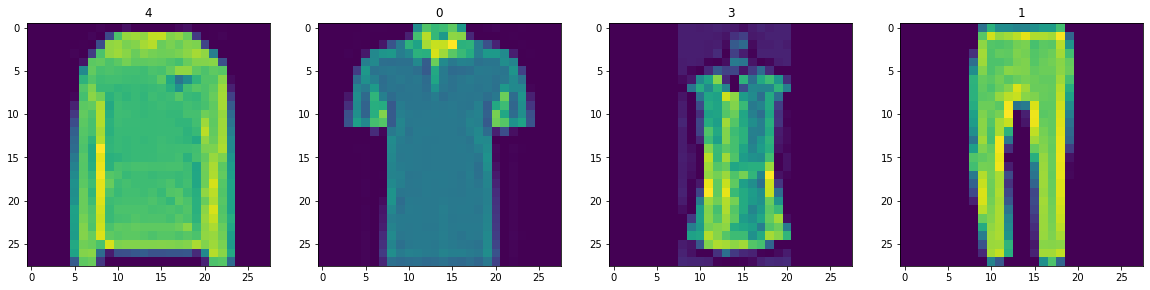

In [35]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [32]:
ax

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'0'}>], dtype=object)

### 3. Build Neural Network

#### 3.1. Import Modelling Components

#### 3.2. Build Generator

#### 3.3. Build Discriminator